In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pynwb import NWBFile, TimeSeries, NWBHDF5IO

In [3]:
# %cd ../..
from pipeline.export import nwb_foraging
%load_ext autoreload
%autoreload 2

[2023-05-08 15:28:54,129][INFO]: Connecting map-superuser@datajoint.mesoscale-activity-map.org:3306
[2023-05-08 15:28:54,794][INFO]: Connected map-superuser@datajoint.mesoscale-activity-map.org:3306


## NWB data export

Generating figures from exported data in NWB format


In [49]:
session_key = {'subject_id': 656489, 'session': 1}

In [50]:
nwbfile = nwb_foraging.datajoint_to_nwb(session_key, if_ephys_units=False)

exporting tracking...done!
exporting behavioral trials...done!
exporting behavior trial events...done!


In [51]:
nwbfile.trials.to_dataframe()

,start_time,stop_time,trial,task,task_protocol,early_lick,outcome,auto_water,free_water,choice,...,photostim_power,photostim_on_to_go_cue,photostim_off_to_go_cue,photostim_duration,photostim_ramping_down,photostim_bpod_timer_align_to,photostim_bpod_timer_offset,left_action_value,right_action_value,rpe
id,,,,,,,,,,,,,,,,,,,,,
0,-0.4883,10.3931,1,foraging,100,early,hit,1,0,left,...,null,null,null,null,null,null,null,NaN,NaN,NaN
1,10.3931,22.3446,2,foraging,100,early,hit,1,0,right,...,null,null,null,null,null,null,null,NaN,NaN,NaN
2,22.3446,29.3759,3,foraging,100,early,hit,1,0,left,...,null,null,null,null,null,null,null,NaN,NaN,NaN
3,29.3759,35.1063,4,foraging,100,no early,hit,1,0,right,...,null,null,null,null,null,null,null,NaN,NaN,NaN
4,35.1063,42.1095,5,foraging,100,early,miss,1,0,right,...,null,null,null,null,null,null,null,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,5114.2839,5120.7645,511,foraging,100,early,miss,0,0,right,...,null,null,null,null,null,null,null,NaN,NaN,NaN
511,5120.7645,5129.6298,512,foraging,100,no early,ignore,0,0,null,...,null,null,null,null,null,null,null,NaN,NaN,NaN
512,5129.6298,5137.5390,513,foraging,100,no early,hit,1,0,left,...,null,null,null,null,null,null,null,NaN,NaN,NaN


(0.0, 100.0)

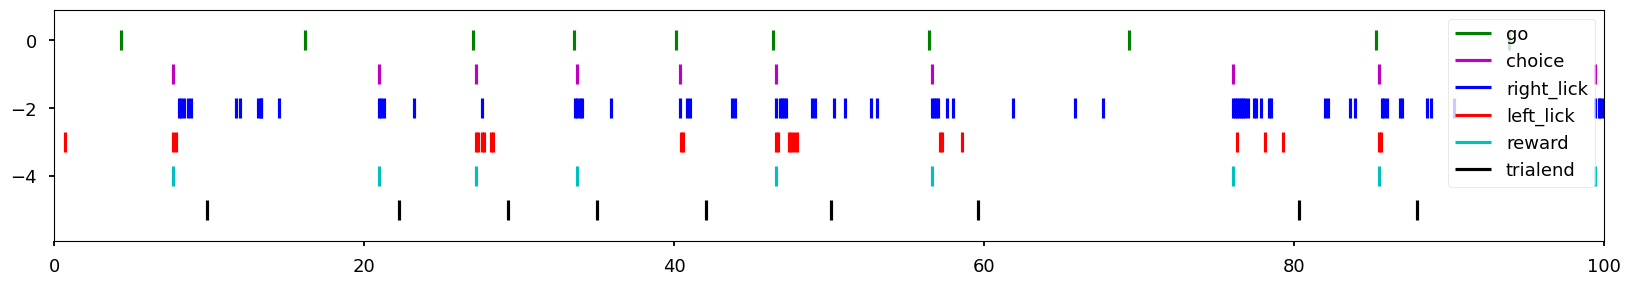

In [54]:
behav_events = nwbfile.acquisition['BehavioralEvents']
event_color_map = {'go': 'g', 'choice': 'm', 'right_lick': 'b', 'left_lick': 'r', 'reward': 'c', 'trialend': 'k'}
event_times = [behav_events[x].timestamps[:] for x in event_color_map]

fig, ax = plt.subplots(1, 1, figsize=(20, 3))
ax.eventplot(event_times, colors=list(event_color_map.values()), linelengths=0.6, lineoffsets=-1)
ax.legend(event_color_map)
ax.set_xlim((0, 100))

### Trials and Units are stored in NWB as dynamic table

In [6]:
trials_df = nwbfile.trials.to_dataframe()
units_df = nwbfile.units.to_dataframe()

In [7]:
trials_df

,start_time,stop_time,trial,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water,photostim_onset,photostim_power,photostim_duration
id,,,,,,,,,,,,,,
0,0.0000,5.6871,1,1,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A
1,5.9737,12.4813,2,2,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
2,12.7684,19.1591,3,3,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A
3,19.4463,25.1962,4,4,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
4,25.4839,31.8922,5,5,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,4021.2310,4027.8509,556,556,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
556,4028.7714,4036.9853,557,557,audio delay,1,left,no early,ignore,0,0,N/A,N/A,N/A
557,4037.9041,4044.3627,558,558,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A


In [8]:
units_df

,sampling_rate,unit_quality,unit_posx,unit_posy,spike_times,spike_sites,spike_depths,unit_amp,unit_snr,isi_violation,...,halfwidth,pt_ratio,repolarization_slope,recovery_slope,spread,velocity_above,velocity_below,electrodes,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
0,29999,multi,0.0,0.0,"[-7.947218323118405, -4.95551535101748, -4.748...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[59.38650714964777, 65.56513848520653, 22.7070...",73.769366,2.380652,1.0,...,0.206035,0.683884,0.302967,-0.054736,150.0,2.118160,NaN,x y z imp \ id...,"[-0.1538246719066616, -0.804680821381079, -1.5...",[nan]
1,29999,multi,32.0,0.0,"[-0.12050280497994237, 3.590983588402283, 4.02...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[114.00674596129676, 61.60907213705137, 74.888...",63.886434,1.941165,1.0,...,0.206035,0.424914,0.156788,-0.005692,180.0,2.897460,NaN,x y z imp \ id...,"[-1.1599225470868093, -1.3031228615419708, -0....",[nan]
2,29999,multi,0.0,105.0,"[-10.315040106283066, -9.113878813157964, -9.0...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...","[116.09443016691154, 118.93588657669969, 112.2...",59.703259,1.666727,1.0,...,0.151092,0.518242,0.166941,-0.032027,225.0,0.885187,-3.455720,x y z imp \ id...,"[-3.4161831470246007, -5.37872314453125, -4.14...",[nan]
3,29999,multi,32.0,105.0,"[-4.1103623448040745, -0.7938184779508557, 2.6...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...","[99.20426671368735, 105.49274347376875, 93.101...",109.210439,3.413537,1.0,...,0.137357,0.637257,0.459546,-0.082757,135.0,0.000000,-2.070600,x y z imp \ id...,"[-0.36813763916290865, -0.6631638312958005, -0...",[nan]
4,29999,multi,0.0,120.0,"[73.54941203172868, 206.22906712253078, 295.46...","[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1...","[119.39482548417224, 135.52551946635592, 137.8...",163.453909,3.098379,1.0,...,0.164828,0.489653,0.515190,-0.074049,225.0,3.149420,-2.991740,x y z imp \ id...,"[2.4619469275841346, 2.412062424879808, 1.4789...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,30000,multi,27.0,680.0,"[2.4131312701593757, 65.00737572057704, 65.055...","[67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 6...","[661.1169038539861, 663.9621298796089, 665.260...",91.108316,2.143441,1.0,...,0.137355,0.548784,0.261317,-0.071300,300.0,1.602480,0.744007,x y z imp \ id ...,"[3.6546610169491522, 3.8532838983050848, 3.257...",[nan]
568,30000,multi,11.0,660.0,"[-9.141485125078079, -9.084884391626908, -9.08...","[67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 6...","[650.4339679375419, 674.0930318907476, 658.365...",151.464844,3.440286,1.0,...,0.192297,1.026640,0.312089,-0.024362,300.0,0.686776,-0.650323,x y z imp \ id ...,"[0.1732610887096774, 0.32762096774193544, -0.2...",[nan]
569,30000,multi,11.0,740.0,"[-9.195085819653746, -9.052817309424302, 1.602...","[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7...","[710.5012638399924, 750.9430134359562, 735.266...",133.669643,2.366135,1.0,...,0.123620,0.814113,0.577629,-0.225950,300.0,0.802618,-0.721115,x y z imp \ id...,"[0.9910714285714285, 1.794642857142857, 1.5357...",[nan]


#### Search the dataframe for left-lick/right-lick trials

In [9]:
right_licks_trials = trials_df.query('trial_instruction == "right" and early_lick == "no early" and outcome == "hit"')
right_licks_trials

,start_time,stop_time,trial,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water,photostim_onset,photostim_power,photostim_duration
id,,,,,,,,,,,,,,
1,5.9737,12.4813,2,2,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
3,19.4463,25.1962,4,4,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
4,25.4839,31.8922,5,5,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
8,54.9797,61.4610,9,9,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
9,61.7547,68.3059,10,10,audio delay,1,right,no early,hit,0,0,2.594,5.500,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,3929.6556,3936.3183,544,544,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
548,3967.2149,3973.7840,549,549,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A
553,4006.0249,4012.6479,554,554,audio delay,1,right,no early,hit,0,0,N/A,N/A,N/A


In [10]:
left_licks_trials = trials_df.query('trial_instruction == "left" and early_lick == "no early" and outcome == "hit"')
left_licks_trials

,start_time,stop_time,trial,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water,photostim_onset,photostim_power,photostim_duration
id,,,,,,,,,,,,,,
0,0.0000,5.6871,1,1,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A
2,12.7684,19.1591,3,3,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A
11,75.9756,81.6361,12,12,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A
13,88.4047,95.0352,14,14,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A
20,139.6354,146.1084,21,21,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,3945.2578,3951.5948,546,546,audio delay,1,left,no early,hit,0,0,2.510,5.500,0.5000
546,3952.4890,3958.9173,547,547,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A
547,3959.8108,3966.3070,548,548,audio delay,1,left,no early,hit,0,0,N/A,N/A,N/A


### Tracking data are stored in NWB under "acquisition"

In [11]:
nwbfile.acquisition

{'BehavioralTimeSeries': BehavioralTimeSeries pynwb.behavior.BehavioralTimeSeries at 0x1976662207008
 Fields:
   time_series: {
     Camera0_side_JawTracking <class 'pynwb.base.TimeSeries'>,
     Camera0_side_NoseTracking <class 'pynwb.base.TimeSeries'>,
     Camera0_side_TongueTracking <class 'pynwb.base.TimeSeries'>
   },
 'BehavioralEvents': BehavioralEvents pynwb.behavior.BehavioralEvents at 0x1976662101744
 Fields:
   time_series: {
     delay_start_times <class 'pynwb.base.TimeSeries'>,
     delay_stop_times <class 'pynwb.base.TimeSeries'>,
     go_start_times <class 'pynwb.base.TimeSeries'>,
     go_stop_times <class 'pynwb.base.TimeSeries'>,
     left_lick_times <class 'pynwb.base.TimeSeries'>,
     photostim_start_times <class 'pynwb.base.TimeSeries'>,
     photostim_stop_times <class 'pynwb.base.TimeSeries'>,
     presample_start_times <class 'pynwb.base.TimeSeries'>,
     presample_stop_times <class 'pynwb.base.TimeSeries'>,
     right_lick_times <class 'pynwb.base.TimeSerie

In [12]:
nwbfile.acquisition['BehavioralTimeSeries']['Camera0_side_JawTracking']

Camera0_side_JawTracking pynwb.base.TimeSeries at 0x1974802165096
Fields:
  comments: no comments
  conversion: 1.0
  data: [[182.65929937 182.67106843 182.69644618 ... 182.66570807 182.53103089
  182.43934441]
 [246.81237745 247.13247705 247.13528991 ... 250.92654133 251.2417798
  250.93220091]
 [  1.           1.           1.         ...   1.           1.
    1.        ]]
  description: Time series for JawTracking position: ('jaw_x', 'jaw_y', 'jaw_likelihood')
  interval: 1
  resolution: -1.0
  timestamps: [0.00000000e+00 3.40000054e-03 6.80000109e-03 ... 4.05718340e+03
 4.05718680e+03 4.05719020e+03]
  timestamps_unit: seconds
  unit: a.u.

#### Plot trialized jaw movement overlayed with spiking activity from a particular unit

In [21]:
def plot_trialized_jaw_movement(unit, title='left lick trials', trial_offset=0, trial_limit=10, xlim=(-0.5, 1)):   
    tongue_likelihood = nwbfile.acquisition['BehavioralTimeSeries']['Camera0_side_TongueTracking'].data[-1, :]
    
    tracking_y = nwbfile.acquisition['BehavioralTimeSeries']['Camera0_side_JawTracking'].data[1, :]
    tracking_ts = nwbfile.acquisition['BehavioralTimeSeries']['Camera0_side_JawTracking'].timestamps
    
#     go_cue_times = nwbfile.acquisition['BehavioralEvents']['go_start_times'].timestamps
    left_lick_times = nwbfile.acquisition['BehavioralEvents']['left_lick_times'].timestamps
    right_lick_times = nwbfile.acquisition['BehavioralEvents']['right_lick_times'].timestamps
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    h_spacing = 150
    
    unit_data = units_df.query(f'id == {unit}').iloc[0]
    
    for conditioned_trials_df, lick_times, ax, ax_name, spk_color in zip(
        (left_licks_trials, right_licks_trials),
        (left_lick_times, right_lick_times),
        axs, 
        ('left lick trials', 'right lick trials'),
        ('b', 'r')): 
        
        if trial_offset < 1 and isinstance(trial_offset, float):
            offset = int(len(conditioned_trials_df) * trial_offset)
        else:
            offset = trial_offset
        
        trial_numbers = conditioned_trials_df.trial[offset:offset+trial_limit].values

        _, row_ind, _ = np.intersect1d(trials_df.trial.values, trial_numbers, return_indices=True)

        for tr_id, row_id in enumerate(row_ind):
            trial_data = trials_df.iloc[row_id]
            align_time = lick_times[np.logical_and(lick_times >= trial_data.start_time, 
                                           lick_times < trial_data.stop_time)][0]

            trk_feat = tracking_y[np.logical_and(tracking_ts >= align_time + xlim[0], 
                                                           tracking_ts < align_time + xlim[-1])]
            tongue_out_bool = tongue_likelihood[np.logical_and(tracking_ts >= align_time + xlim[0], 
                                                           tracking_ts < align_time + xlim[-1])] > 0.9

            spike_times = unit_data.spike_times[np.logical_and(unit_data.spike_times >= align_time + xlim[0], 
                                                           unit_data.spike_times < align_time + xlim[-1])]
            spike_times -= align_time

            tvec = np.linspace(*xlim, len(trk_feat))

            # plot
            ax.plot(tvec, trk_feat + tr_id * h_spacing, '.k', markersize=1)
            ax.plot(tvec[tongue_out_bool], trk_feat[tongue_out_bool] + tr_id * h_spacing, '.', color='lime', markersize=2)
            ax.plot(spike_times, np.full_like(spike_times, trk_feat[tongue_out_bool].mean() + h_spacing/10) + tr_id * h_spacing,
                    '|', color=spk_color, markersize=4)


        ax.set_title(ax_name)
        ax.axvline(x=0, linestyle='--', color='k')

        # cosmetic
        ax.set_xlim(xlim)
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

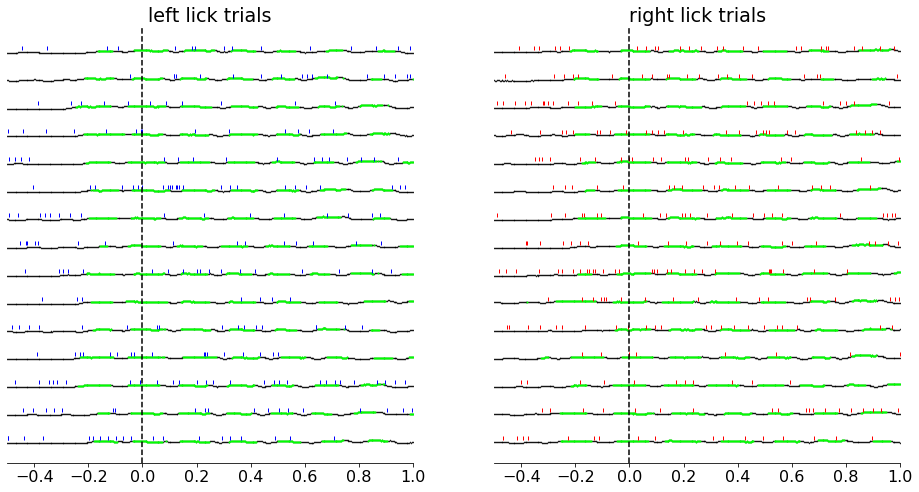

In [22]:
plot_trialized_jaw_movement(unit=84, trial_offset=0.5, trial_limit=15)

## Video tracking foraging

In [4]:
import datajoint as dj
import pathlib
import numpy as np
import json
from datetime import datetime
from dateutil.tz import tzlocal
from datajoint.errors import DataJointError
import pynwb
from pynwb import NWBFile, NWBHDF5IO

from pipeline import lab, experiment, tracking, ephys, histology, psth, ccf, foraging_model
from pipeline.util import _get_session_independent_variable
from pipeline.report import get_wr_sessdatetime
from pipeline.ingest import ephys as ephys_ingest
from pipeline.ingest import tracking as tracking_ingest

# Some constants to work with
zero_time = datetime.strptime('00:00:00', '%H:%M:%S').time()  # no precise time available


In [5]:
session_key = {'subject_id': 482353, 'session': 45}

In [12]:
raw_ephys=False
raw_video=False

In [13]:
    """
    Generate one NWBFile object representing all data
    coming from the specified "session_key" (representing one session)
    """
    water_res_num, sess_datetime = get_wr_sessdatetime(session_key)

    session_identifier = f'{water_res_num}_{sess_datetime}_s{session_key["session"]}'

    experiment_description = (experiment.TaskProtocol
                            & (experiment.BehaviorTrial & session_key)).fetch1(
        'task_protocol_description')

    try:
        session_descr = (experiment.SessionComment & session_key).fetch1('session_comment')
    except DataJointError:
        session_descr = ''

    nwbfile = NWBFile(identifier=session_identifier,
                    session_description=session_descr,
                    session_start_time=datetime.strptime(sess_datetime, '%Y%m%d_%H%M%S'),
                    file_create_date=datetime.now(tzlocal()),
                    experimenter=list((experiment.Session & session_key).fetch('username')),
                    data_collection='',
                    institution='Janelia Research Campus / Allen Institute',
                    experiment_description=experiment_description,
                    related_publications='',
                    keywords=[])

    # ==================================== SUBJECT ==================================
    subject = (lab.Subject * lab.WaterRestriction.proj('water_restriction_number') & session_key).fetch1()
    nwbfile.subject = pynwb.file.Subject(
        subject_id=str(subject['subject_id']),
        date_of_birth=datetime.combine(subject['date_of_birth'], zero_time) if subject['date_of_birth'] else None,
        description=subject['water_restriction_number'],
        sex=subject['sex'],
        species='mus musculus')

    # ==================================== EPHYS ==================================
    # add additional columns to the electrodes table
    electrodes_query = lab.ProbeType.Electrode * lab.ElectrodeConfig.Electrode
    for additional_attribute in ['shank', 'shank_col', 'shank_row']:
        nwbfile.add_electrode_column(
            name=electrodes_query.heading.attributes[additional_attribute].name,
            description=electrodes_query.heading.attributes[additional_attribute].comment)

    nwbfile.add_electrode_column(name='electrode_id', description='electrode id on the probe')  # Don't use id to avoid confusion
    nwbfile.add_electrode_column(name='ccf_annotation', description='ccf annotation')  # Don't use id to avoid confusion

    # unit_qc
    unit_qc = {'minimal': 'unit_amp > 70 '
                   'AND avg_firing_rate > 0.1 '
                   'AND presence_ratio > 0.9 '
                   'AND isi_violation < 0.1 '
                   'AND amplitude_cutoff < 0.15'}
    qc_in_use = unit_qc['minimal']
    
    nwbfile.units = pynwb.file.Units(name='units', description=f'unit qc = {qc_in_use}')


    # add additional columns to the units table
    if dj.__version__ >= '0.13.0':
        units_query = (ephys.ProbeInsertion.RecordingSystemSetup
                    * ephys.Unit & session_key).proj(..., '-spike_sites', '-spike_depths').join(    # Remove spike_sites and depths to avoid inhomogeneous error
            ephys.UnitStat, left=True).join(
            ephys.MAPClusterMetric.DriftMetric, left=True).join(
            ephys.ClusterMetric, left=True).join(
            ephys.WaveformMetric, left=True)
    else:
        units_query = (ephys.ProbeInsertion.RecordingSystemSetup
                    * ephys.Unit & session_key).proj(...).aggr(
            ephys.UnitStat, ..., **{n: n for n in ephys.UnitStat.heading.names if n not in ephys.UnitStat.heading.primary_key},
            keep_all_rows=True).aggr(
            ephys.MAPClusterMetric.DriftMetric, ..., **{n: n for n in ephys.MAPClusterMetric.DriftMetric.heading.names if n not in ephys.MAPClusterMetric.DriftMetric.heading.primary_key},
            keep_all_rows=True).aggr(
            ephys.ClusterMetric, ..., **{n: n for n in ephys.ClusterMetric.heading.names if n not in ephys.ClusterMetric.heading.primary_key},
            keep_all_rows=True).aggr(
            ephys.WaveformMetric, ..., **{n: n for n in ephys.WaveformMetric.heading.names if n not in ephys.WaveformMetric.heading.primary_key},
            keep_all_rows=True)

    units_query = units_query & qc_in_use

    units_omitted_attributes = ['subject_id', 'session',
                                'clustering_method', 'unit', 'unit_uid', 'probe_type',
                                'epoch_name_quality_metrics', 'epoch_name_waveform_metrics',
                                'electrode_config_name', 'electrode_group',
                                'electrode', 'waveform', 'annotation_version']

    for attr in units_query.heading.names:
        if attr in units_omitted_attributes + ['spike_times']:   # Don't add column `spike_times` to avoid inhomogeneous error (leave it as nwb internal data type that enables DynamicTable (spike_times + spike_times_index))
            continue
        nwbfile.add_unit_column(
            name=units_query.heading.attributes[attr].name,
            description=units_query.heading.attributes[attr].comment)
        
    nwbfile.add_unit_column(name='unit_id', description='original unit_id on one probe')  # Don't use id to avoid confusion

    # iterate through curated clusterings and export units data
    for insert_key in (ephys.ProbeInsertion & session_key).fetch('KEY'):
    # ---- Probe Insertion Location ----
        if ephys.ProbeInsertion.InsertionLocation & insert_key:
            insert_location = {
                k: str(v) for k, v in (ephys.ProbeInsertion.InsertionLocation.proj()
                                        & insert_key).aggr(
                    ephys.ProbeInsertion.RecordableBrainRegion.proj(
                        ..., brain_region='CONCAT(hemisphere, " ", brain_area)'),
                    ..., brain_regions='GROUP_CONCAT(brain_region SEPARATOR ", ")').fetch1().items()
                if k not in ephys.ProbeInsertion.primary_key}
            insert_location = json.dumps(insert_location)
        else:
            insert_location = 'N/A'

        # ---- Electrode Configuration ----
        electrode_config = (lab.Probe * lab.ProbeType * lab.ElectrodeConfig
                            * ephys.ProbeInsertion & insert_key).fetch1()
        ephys_device_name = f'{electrode_config["probe"]} ({electrode_config["probe_type"]})'
        ephys_device = (nwbfile.get_device(ephys_device_name)
                        if ephys_device_name in nwbfile.devices
                        else nwbfile.create_device(name=ephys_device_name))

        electrode_group = nwbfile.create_electrode_group(
            name=f'{electrode_config["probe"]} {electrode_config["electrode_config_name"]}',
            description=json.dumps(electrode_config, default=str),
            device=ephys_device,
            location=insert_location)

        electrode_query = (lab.ProbeType.Electrode * lab.ElectrodeConfig.Electrode
                            & electrode_config)
        electrode_ccf = {e: {'x': float(z), 'y': float(y), 'z': 5739 * 2 - float(x),    # Turn DataJoint ccf to real allen_ccf
                             'ccf_annotation': annot} for e, x, y, z, annot in zip(
            * (histology.ElectrodeCCFPosition.ElectrodePosition * ccf.CCFAnnotation 
               & electrode_config).fetch(
                'electrode', 'ccf_x', 'ccf_y', 'ccf_z', 'annotation'))}

        for electrode in electrode_query.fetch(as_dict=True):
            nwbfile.add_electrode(
                electrode_id=electrode['electrode'], group=electrode_group,
                filtering='', imp=-1.,
                **electrode_ccf.get(electrode['electrode'], {'x': np.nan, 'y': np.nan, 'z': np.nan, 'ccf_annotation': 'unknown'}),
                rel_x=electrode['x_coord'], rel_y=electrode['y_coord'], rel_z=np.nan,
                shank=electrode['shank'], shank_col=electrode['shank_col'], shank_row=electrode['shank_row'],
                location=electrode_group.location)

        electrode_df = nwbfile.electrodes.to_dataframe()
        electrode_ind = electrode_df.electrode_id[electrode_df.group_name == electrode_group.name]  # index: index in nwbfile.electrodes; value: original electrode index in that probe

        # ---- Units ----
        unit_query = units_query & insert_key
        for unit in unit_query.fetch(as_dict=True, order_by='unit'):
            # make an electrode table region (which electrode(s) is this unit coming from)
            unit['unit_id'] = unit.pop('unit')
            unit['electrodes'] = electrode_ind.index[electrode_ind == unit.pop('electrode')].values

            unit['electrode_group'] = electrode_group
            unit['waveform_mean'] = unit.pop('waveform')
            unit['waveform_sd'] = np.full(1, np.nan)

            for attr in list(unit.keys()):
                if attr in units_omitted_attributes:
                    unit.pop(attr)
                elif unit[attr] is None:
                    unit[attr] = np.nan

            nwbfile.add_unit(**unit)


        # ---- Raw Ephys Data ---
        if raw_ephys:
            ks_dir_relpath = (ephys_ingest.EphysIngest.EphysFile.proj(
                ..., insertion_number='probe_insertion_number')
                              & insert_key).fetch('ephys_file')
            ks_dir = ephys_root_data_dir / ks_dir_relpath
            npx_dir = ks_dir.parent

            try:
                next(npx_dir.glob('*imec*.ap.bin'))
            except StopIteration:
                raise FileNotFoundError(f'No raw ephys file (.ap.bin) found at {npx_dir}')

            sampling_rate = (ephys.ProbeInsertion.RecordingSystemSetup & insert_key).fetch1('sampling_rate')
            probe_id, probe_type = (ephys.ProbeInsertion & insert_key).fetch1('probe', 'probe_type')
            mapping = get_electrodes_mapping(nwbfile.electrodes)

            extractor = extractors.read_spikeglx(npx_dir)

            conversion_kwargs = gains_helper(extractor.get_channel_gains())

            recording_channels_by_id = (lab.ElectrodeConfig.Electrode * ephys.ProbeInsertion
                                        & insert_key).fetch('electrode')

            probe_str = f'{probe_id} ({probe_type})'

            nwbfile.add_acquisition(
                pynwb.ecephys.ElectricalSeries(
                    name=f"ElectricalSeries{insert_key['insertion_number']}",
                    description=f"Ephys recording from {probe_str}, at location: {insert_location}",
                    data=SpikeInterfaceRecordingDataChunkIterator(extractor),
                    rate=float(sampling_rate),
                    electrodes=nwbfile.create_electrode_table_region(
                        region=[mapping[(probe_str, x)] for x in recording_channels_by_id],
                        name="electrodes",
                        description="recorded electrodes",
                    ),
                    **conversion_kwargs
                )
            )

    # =============================== PHOTO-STIMULATION ===============================
    stim_sites = {}
    photostim_query = (experiment.Photostim & (experiment.PhotostimTrial & session_key))
    if photostim_query:
        for photostim_key in photostim_query.fetch('KEY'):
            photostim = (experiment.Photostim * lab.PhotostimDevice.proj('excitation_wavelength') & photostim_key).fetch1()
            stim_device = (nwbfile.get_device(photostim['photostim_device'])
                        if photostim['photostim_device'] in nwbfile.devices
                        else nwbfile.create_device(name=photostim['photostim_device']))

            stim_site = pynwb.ogen.OptogeneticStimulusSite(
                name=f'{photostim["photostim_device"]}_{photostim["photo_stim"]}',
                device=stim_device,
                excitation_lambda=float(photostim['excitation_wavelength']),
                location=json.dumps([{k: v for k, v in stim_locs.items()
                                    if k not in experiment.Photostim.primary_key}
                                    for stim_locs in (experiment.Photostim.PhotostimLocation
                                                    & photostim_key).fetch(as_dict=True)], default=str),
                description=f'excitation_duration: {photostim["duration"]}')
            nwbfile.add_ogen_site(stim_site)
            stim_sites[photostim['photo_stim']] = stim_site 
            
            
    # =============================== BEHAVIOR TRIALS ===============================     
    q_photostim = (experiment.PhotostimEvent
                   * experiment.Photostim & session_key).proj(
        'photostim_event_time', 'power', 'duration')
    q_trial = experiment.SessionTrial * experiment.BehaviorTrial & session_key 
    q_trial *= experiment.WaterPortChoice.proj(choice='water_port')  # Add choice
    
    # reward schedule
    q_p_reward = experiment.BehaviorTrial.proj() * experiment.SessionBlock.BlockTrial * experiment.SessionBlock.WaterPortRewardProbability & session_key
    p_reward = np.vstack([(q_p_reward & 'water_port="left"').fetch('reward_probability', order_by='trial').astype(float),
                          (q_p_reward & 'water_port="right"').fetch('reward_probability', order_by='trial').astype(float)])
 
    
    model_id = 20  # Hard-coded model_id (Hattori with choice kernel)
    
    _, df_latent = _get_session_independent_variable(session_key, model_id=model_id)
    
    # q_trial = q_trial.aggr(
    #     q_photostim, ...,
    #     photostim_onset='IFNULL(GROUP_CONCAT(photostim_event_time SEPARATOR ", "), "N/A")',
    #     photostim_power='IFNULL(GROUP_CONCAT(power SEPARATOR ", "), "N/A")',
    #     photostim_duration='IFNULL(GROUP_CONCAT(duration SEPARATOR ", "), "N/A")',
    #     keep_all_rows=True)

    skip_adding_columns = experiment.Session.primary_key 

    if q_trial:
        # Get trial descriptors from TrialSet.Trial and TrialStimInfo
        trial_columns = {tag: {'name': tag,
                               'description': q_trial.heading.attributes[tag].comment}
                         for tag in q_trial.heading.names
                         if tag not in skip_adding_columns + ['start_time', 'stop_time']}
        
        # Add new table columns to nwb trial-table
        for column in trial_columns.values():
            nwbfile.add_trial_column(**column)
      
        nwbfile.add_trial_column(name='left_reward_prob', description=f'reward refill prob. of the left port')
        nwbfile.add_trial_column(name='right_reward_prob', description=f'reward refill prob. of the right port')
        nwbfile.add_trial_column(name='left_action_value', description=f'left action value after each trial, from model {model_id}')
        nwbfile.add_trial_column(name='right_action_value', description=f'right action value after each trial, from model {model_id}')
        nwbfile.add_trial_column(name='rpe', description=f'reward prediction error of each trial, from model {model_id}')

        # Add entries to the trial-table
        for trial in q_trial.fetch(as_dict=True):
            trial['start_time'], trial['stop_time'] = float(trial['start_time']), float(trial['stop_time'])
            if trial['choice'] is None:
                trial['choice'] = 'null'
            
            trial['left_reward_prob'], trial['right_reward_prob'] = p_reward[:, trial['trial'] - 1]
            
            if any(df_latent.trial==trial['trial']):
                trial['left_action_value'], trial['right_action_value'], trial['rpe'] = df_latent.loc[df_latent.trial==trial['trial'], ['left_action_value', 'right_action_value', 'rpe']].values[0]
            else:
                trial['left_action_value'], trial['right_action_value'], trial['rpe'] = [np.nan] * 3  # Ignored trial
            
            nwbfile.add_trial(**{k: v for k, v in trial.items() if k not in skip_adding_columns})


    # =============================== BEHAVIOR TRIALS' EVENTS ===============================

    behavioral_event = pynwb.behavior.BehavioralEvents(name='BehavioralEvents')
    nwbfile.add_acquisition(behavioral_event)

    # ---- behavior events
    q_trial_event = ephys.TrialEvent & session_key
    first_trial_bitcode_start = (q_trial_event & {'trial_event_type': 'bitcodestart', 'trial': 1}).fetch1('trial_event_time')
    q_trial_event = q_trial_event.proj(trial_event_type='trial_event_type', trial_event_time=f'trial_event_time - {first_trial_bitcode_start}')  # Align with ephys: 0 = first trial start
    unique_trial_event_type = (experiment.TrialEventType & q_trial_event).fetch('trial_event_type')
    
    trial_event_to_exclude = ['bitcodestart', 'bpodstart', 'zaberstep']

    for trial_event_type in unique_trial_event_type:
        if trial_event_type in trial_event_to_exclude:
            continue
        
        trial, trial_event_time = (q_trial_event & {'trial_event_type': trial_event_type}).fetch(
            'trial', 'trial_event_time', order_by='trial')
        
        behavioral_event.create_timeseries(
            name='lickportready' if trial_event_type == 'zaberready' else trial_event_type,
            unit='a.u.', conversion=1.0,
            data=np.full_like(trial_event_time.astype(float), 1),
            timestamps=trial_event_time.astype(float),
            description='time (second) relative to the first trial start (aligned with ephys)')         

    # If there is no zaber feedback, estimate `lickportready` using bitcodestart
    # see https://github.com/hanhou/map-ephys/blob/26892a06b5877687ba4c95d23cbefa5ab4266033/pipeline/psth_foraging.py#L379
    offset_bitcodestart_to_zaberready = 0.146
    
    if 'zaberready' not in unique_trial_event_type:
        bitcodestart_time = (q_trial_event & {'trial_event_type': 'bitcodestart'}).fetch(
                                              'trial_event_time', order_by='trial')
        
        behavioral_event.create_timeseries(
            name='lickportready',
            unit='a.u.', conversion=1.0,
            data=np.full_like(bitcodestart_time.astype(float), 1),
            timestamps=bitcodestart_time.astype(float) + offset_bitcodestart_to_zaberready,
            description='time (second) relative to the first trial start (aligned with ephys)') 
        

    # ---- action events

    q_action_event = ephys.ActionEvent & session_key
    q_action_event = q_action_event.proj(action_event_type='action_event_type', action_event_time=f'action_event_time - {first_trial_bitcode_start}')  # Align with ephys: 0 = first trial start
    unique_action_event_type = (experiment.ActionEventType & q_action_event).fetch('action_event_type')

    for action_event_type in unique_action_event_type:
        trial, action_event_time = (q_action_event
                               & {'action_event_type': action_event_type}).fetch(
            'trial', 'action_event_time', order_by='trial')

        behavioral_event.create_timeseries(
            name=action_event_type.replace(' ', '_'),
            unit='a.u.', conversion=1.0,
            data=np.full_like(action_event_time.astype(float), 1),
            timestamps=action_event_time.astype(float),
            description='time (second) relative to the first trial start (aligned with ephys)')
        
    # If no lick time in ephys NI, use bpod time
    if 'left lick' not in unique_action_event_type:
        first_trial_bitcode_start = (ephys.TrialEvent & session_key & {'trial_event_type': 'bitcodestart', 'trial': 1}).fetch1('trial_event_time')
        q_action_global_from_bpod = ((experiment.ActionEvent & session_key)
                                     * (experiment.TrialEvent & 'trial_event_type = "go"').proj(go_bpod='trial_event_time')
                                     * (ephys.TrialEvent & 'trial_event_type = "go"').proj(go_global='trial_event_time')
                                     ).proj(..., action_event_time_global=f'action_event_time - go_bpod + go_global - {first_trial_bitcode_start}')

        for action_event_type in ['left lick', 'right lick']:
            action_event_time_global_from_bpod = (q_action_global_from_bpod & {'action_event_type': action_event_type}).fetch('action_event_time_global')
            
            behavioral_event.create_timeseries(
                name=action_event_type.replace(' ', '_'),
                unit='a.u.', conversion=1.0,
                data=np.full_like(action_event_time_global_from_bpod.astype(float), 1),
                timestamps=action_event_time_global_from_bpod.astype(float),
                description='time (second) relative to the first trial start (aligned with ephys)')

In [14]:
nwbfile.trials.to_dataframe()

,start_time,stop_time,trial,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water,choice,left_reward_prob,right_reward_prob,left_action_value,right_action_value,rpe
id,,,,,,,,,,,,,,,,,
0,-0.5381,9.5510,1,30881,foraging,100,none,no early,hit,0,0,left,0.338,0.113,0.510122,0.000000,1.000000
1,9.5510,16.5274,2,30882,foraging,100,none,no early,miss,0,0,left,0.338,0.113,0.282956,0.000000,-0.510122
2,16.5274,27.1126,3,30883,foraging,100,none,early,hit,0,0,left,0.338,0.113,0.648736,0.000000,0.717044
3,27.1126,39.9647,4,30884,foraging,100,none,early,hit,0,0,left,0.338,0.113,0.827923,0.000000,0.351264
4,39.9647,45.9172,5,30885,foraging,100,none,no early,miss,0,0,left,0.338,0.113,0.459234,0.000000,-0.827923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6470.6752,6485.7258,678,31558,foraging,100,none,early,miss,0,0,left,0.113,0.338,0.000231,0.025060,-0.000417
678,6485.7258,6496.2766,679,31559,foraging,100,none,no early,ignore,0,0,null,0.113,0.338,NaN,NaN,NaN
679,6496.2766,6508.5194,680,31560,foraging,100,none,early,miss,0,0,left,0.113,0.338,0.000128,0.005225,-0.000231


In [8]:
len(nwbfile.acquisition['BehavioralEvents']['go'].timestamps)

682

In [ ]:
            {'bottom': {
            # 'fiducial in DLC':   ('prefix of field', {sub attr}) 
            'nosetip':              ('nose', {}),
            'tongueTip':            ('tongue', {}),
            **{'tongue' + pos: ('tongue_side', {'side': pos}) for pos in ['LeftFront', 'RightFront', 'LeftBack', 'RightBack']}, 
            'jaw':                  ('jaw', {}),
            'pawL':                 ('left_paw', {}),
            'pawR':                 ('right_paw', {}),
            **{'W' + pos: ('whisker', {'whisker_name': pos}) for pos in ['Lup', 'Lmid', 'Lbot', 'Rup', 'Rmid', 'Rbot']}, 
            },
            
            'side': {
             **{'pupil' + pos: ('pupil_side', {'side': pos}) for pos in ['Up', 'Down', 'Left', 'Right']}, 
             'noseTip':     ('nose', {}),
             'jaw':         ('jaw', {}),
             'tongueTip':   ('tongue', {}),
             **{'tongue' + pos: ('tongue_side', {'side': pos}) for pos in ['Mid', 'Up', 'Down']}, 
             **{'whisker' + pos: ('whisker', {'whisker_name': pos}) for pos in ['Back', 'Mid', 'Front']}, 
            }
            }

In [21]:
    if tracking_ingest.TrackingIngestForaging & session_key:
        behav_acq = pynwb.behavior.BehavioralTimeSeries(name='BehavioralTimeSeries')
        nwbfile.add_acquisition(behav_acq)

In [22]:
        tracking_devices = (tracking.TrackingDevice & (tracking_ingest.TrackingIngestForaging & session_key)).fetch(as_dict=True)

        for trk_device in tracking_devices:
            trk_device_name = trk_device['tracking_device'].replace(' ', '') + '_' + trk_device['tracking_position']
            trk_fs = float(trk_device['sampling_rate'])
            
            foraging_tracking_features = tracking.Tracking().tracking_features
            foraging_tracking_features = {x:foraging_tracking_features[x] for x in foraging_tracking_features if x[0] == x[0].lower()}
            
            for feature, feature_tbl in foraging_tracking_features.items():
                ft_attrs = [n for n in feature_tbl.heading.names if n not in feature_tbl.primary_key]
                if feature_tbl & trk_device & session_key:
                    if feature == 'whisker':
                        additional_conditions = [{'whisker_name': n} for n in
                                                 set((feature_tbl & trk_device & session_key).fetch(
                                                     'whisker_name'))]
                    elif feature in ('tongue_side', 'pupil_side'):
                        additional_conditions = [{'side': n} for n in
                                                 set((feature_tbl & trk_device & session_key).fetch(
                                                     'side'))]
                    else:
                        additional_conditions = [{}]
                        
                    for r in additional_conditions:
                        # print(f'    ... {trk_device_name}, {feature}: {ft_attrs}, {r}')
 
                        trials, samples, start_time, stop_time, ni_time, *position_data = (experiment.SessionTrial
                                                               * tracking.Tracking
                                                               * tracking.Tracking.Frame
                                                               * feature_tbl
                                                               & trk_device
                                                               & session_key
                                                               & r).fetch(
                            'trial', 'tracking_samples', 'start_time', 'stop_time', 'frame_time', *ft_attrs, order_by='trial')
        
                        if all([sample == len(ni_t) == data.shape[0] for sample, ni_t, data in zip(samples, ni_time, position_data[0])]):
                            pass
                            # print('   Sanity check passed!')
                        else:
                            print('     !!!!!!!!!!! Wrong frame number !!!!!!!!!!!!')

                        # tracking_timestamps = np.hstack([np.arange(nsample) / trk_fs + float(trial_start_time)
                        #                                  for nsample, trial_start_time in zip(samples, start_time)])
            
                        tracking_timestamps = np.hstack([t for t in ni_time])  # Concatenate all trials                
                        position_data = np.vstack([np.hstack(d) for d in position_data]).T
                        behav_ts_name = f'{trk_device_name}_{feature}' + (f'_{list(r.values())[0]}' if r else '')
                        behav_acq.create_timeseries(name=behav_ts_name,
                                                    data=position_data,
                                                    timestamps=tracking_timestamps,  # Global NI time
                                                    description=f'Time series for {feature} position: {tuple(ft_attrs)}',
                                                    unit='a.u.',
                                                    conversion=1.0)

In [24]:
import pandas as pd
mapping = pd.DataFrame((tracking_ingest.TrackingIngestForaging.TrackingFile * tracking.Tracking.Frame & session_key).fetch())
mapping

,subject_id,session,tracking_device,trial,video_trial_num,tracking_file,frame_time
0,482353,45,Camera 0,1,1,HH13/HH13_S10_20211117/side_face_1-0000DLC_res...,"[5.063393, 5.066678, 5.069978, 5.073278, 5.076..."
1,482353,45,Camera 0,2,2,HH13/HH13_S10_20211117/side_face_2-0000DLC_res...,"[14.634924, 14.638209, 14.641509, 14.644809, 1..."
2,482353,45,Camera 0,3,3,HH13/HH13_S10_20211117/side_face_3-0000DLC_res...,"[21.60719, 21.610475, 21.61378, 21.61708, 21.6..."
3,482353,45,Camera 0,4,4,HH13/HH13_S10_20211117/side_face_4-0000DLC_res...,"[32.19306, 32.19635, 32.19965, 32.20295, 32.20..."
4,482353,45,Camera 0,5,5,HH13/HH13_S10_20211117/side_face_5-0000DLC_res...,"[45.048353, 45.051638, 45.054938, 45.058238, 4..."
...,...,...,...,...,...,...,...
1351,482353,45,Camera 1,677,677,HH13/HH13_S10_20211117/bottom_face_677-0000DLC...,"[6464.120857, 6464.124142, 6464.127442, 6464.1..."
1352,482353,45,Camera 1,678,678,HH13/HH13_S10_20211117/bottom_face_678-0000DLC...,"[6475.762664, 6475.765954, 6475.769254, 6475.7..."
1353,482353,45,Camera 1,679,679,HH13/HH13_S10_20211117/bottom_face_679-0000DLC...,"[6490.810842, 6490.814127, 6490.817427, 6490.8..."
1354,482353,45,Camera 1,680,680,HH13/HH13_S10_20211117/bottom_face_680-0000DLC...,"[6501.35791, 6501.361195, 6501.364495, 6501.36..."


In [10]:
mapping.query('trial==1').frame_time

0      [5.063393, 5.066678, 5.069978, 5.073278, 5.076...
676    [5.063393, 5.066678, 5.069978, 5.073278, 5.076...
Name: frame_time, dtype: object

In [6]:
tracking.Tracking.Frame & session_key

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,frame_time Global session-wise time (in sec)
482353,45,1,Camera 0,=BLOB=
482353,45,1,Camera 1,=BLOB=
482353,45,1,Camera 2,=BLOB=
482353,45,2,Camera 0,=BLOB=
482353,45,2,Camera 1,=BLOB=
482353,45,2,Camera 2,=BLOB=
482353,45,3,Camera 0,=BLOB=
482353,45,3,Camera 1,=BLOB=
482353,45,3,Camera 2,=BLOB=
482353,45,4,Camera 0,=BLOB=


In [18]:
nwbfile.add_scratch(mapping, name='video_frame_mapping', description='maps each video file name to ')

root pynwb.file.NWBFile at 0x140263989293904
Fields:
  acquisition: {
    BehavioralEvents <class 'pynwb.behavior.BehavioralEvents'>,
    BehavioralTimeSeries <class 'pynwb.behavior.BehavioralTimeSeries'>
  }
  devices: {
    18005108622 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>,
    18005123491 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    18005108622 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>,
    18005123491 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: moving lickports, delay period, early lick punishment, sound GO cue then free choice
  experimenter: ['HH']
  file_create_date: [datetime.datetime(2023, 3, 23, 22, 16, 10, 503388, tzinfo=tzlocal())]
  identifier: HH13_20211117_110858_s45
  institution: Janelia Research Campus / Allen Institute
  related_publications: ['']
  session_description: PERFECT
  session_start_time: 2021-11-17 11:08:

In [35]:
nwbfile.acquisition['BehavioralTimeSeries']['Camera0_side_jaw'].data[:]

array([[135.11486816, 196.23399353,   0.99999714],
       [135.68322754, 196.2194519 ,   0.99999714],
       [135.99119568, 196.75218201,   0.99999487],
       ...,
       [134.9251709 , 110.05849457,   0.99999797],
       [134.06082153, 110.42711639,   0.99999845],
       [134.55986023, 109.2355423 ,   0.99999857]])

In [ ]:
'

In [ ]:
tracking = []
for d in position_data:
    for trial in d:
        

In [10]:
position_data

array([59.36798859, 59.69776535, 60.06868362, ...,  1.        ,
        1.        ,  1.        ])

In [ ]:
behav_acq['Camera1_bottom_pupil_side_Lbot'].data

In [ ]:
(experiment.SessionTrial
    * tracking.Tracking
    * tracking.Tracking.Frame
    * tracking_ingest.TrackingIngestForaging.TrackingFile
    * feature_tbl
    & session_key
    & r)

In [39]:
tracking_devices

[{'tracking_device': 'Camera 0',
  'tracking_position': 'side',
  'sampling_rate': Decimal('294.1176'),
  'tracking_device_description': 'Chameleon3 CM3-U3-13Y3M-CS (FLIR)'},
 {'tracking_device': 'Camera 1',
  'tracking_position': 'bottom',
  'sampling_rate': Decimal('294.1176'),
  'tracking_device_description': 'Chameleon3 CM3-U3-13Y3M-CS (FLIR)'},
 {'tracking_device': 'Camera 2',
  'tracking_position': 'body',
  'sampling_rate': Decimal('294.1176'),
  'tracking_device_description': 'Chameleon3 CM3-U3-13Y3M-CS (FLIR)'}]